# CH07_1 Generating MultiLayered neural Network classifying many images 

- Last update : 2022.04.09.

## Generating MultiLayered classification neural Network

In [3]:
# 1. Adding softmax function 

def sigmoid(self, z): 
    a = 1/ (1+np.exp(-z))       # Sigmoid calculation 
    return a 

def softmax(self, z): 
    # softmax function 
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)

In [4]:
# 2. Calculating forward propagation  

def forpass(self, x): 
    ...
    self.a1 = self.sigmoid(z1)   # apply activation function 
    ...

In [5]:
# 3. Initializing weight 

def init_weights(self, n_features, n_classes):
    ... 
    self.w2 = np.random.normal(0, 1, (self.units, n_classes))  # (no. of hidden layer, no. of classes)
    self.b2 = np.zeros(n_classes)

In [6]:
# 4. Modifying fit method

def fit(self, x, y, epochs=100, x_val=None, y_val=None): 
    np.random.seed(42)
    self.init_weights(x.shape[1], y.shape[1])   # initializing weights of hidden layer and output layer
    
    # repeate routine epoch times 
    for i in range(epochs): 
        loss = 0 
        print('.', end='')
        # Circulating mini batch returned from generator function 
        for x_batch, y_batch in self.gen_batch(x, y): 
            a = self.training(x_batch, y_batch)
            # clipping for safe logarian calculation 
            a = np.clip(a, 1e-10, 1-1e-10)
            # Adding it to the list after accumulating logarian loss and Regularization loss to the function
            loss += np.sum(-y_batch*np.log(a))
        self.losses.append((loss + self.reg_loss()) / len(x))
        # Calculating loss on verification set 
        self.update_val_loss(x_val, y_val)        

In [1]:
# 5. modifying training() method

def training(self, x, y): 
    m = len(x)                # Saving the no. of samples 
    z = self.forpass(x)       # Implementing forward propagation calculation
    a = self.softmax(z)       # Applying the activation function  

In [ ]:
# 6. modifying predict() method 

def predict(self, x): 
    z = self.forpass(x)           # Implementing forward propagation calculation 
    return np.argmax(z, axis=1)   # Returning index of the largest value 

In [ ]:
# 7. modyfying score() method

def score(self, x, y):
    # Returning the rate of True value after comparing prediction with target column vector
    return np.mean(self.predict(x) == np.argmax(y, axis=1))

In [1]:
# 8. Calculating verification loss 

def update_val_loss(self, x_val, y_val): 
    ...
    a = self.softmax(z)
    ...
    # adding it to the list after summing up cross entropy loss and regulaterization loss 
    val_loss = np.sum(-y_val * np.log(a))
    ...

# MultiClassNetwork 

In [84]:
class MultiClassNetwork:
    
    def __init__(self,units=10,batch_size=32,learning_rate=0.1,l1=0,l2=0):
        self.units = units               # the no. of Neuron in hidden layer
        self.batch_size = batch_size     # batch size 
        self.w1 = None                   # weight of hidden layer 
        self.b1 = None                   # interscet of hidden layer 
        self.w2 = None                   # weight of output layer 
        self.b2 = None                   # interscet of output layer 
        self.a1 = None                   # activation output of hidden layer
        self.losses = []                 # training loss  
        self.val_losses = []             # verification loss 
        self.lr = learning_rate          # learning rate 
        self.l1 = l1                     # L1 loss hyperparameter
        self.l2 = l2                     # L2 loss hyperparameter
        
    def forpass(self, x): 
        z1 = np.dot(x, self.w1) + self.b1        # calculating linear regression in first layer 
        self.a1 = self.sigmoid(z1)               # applying activation function 
        z2 = np.dot(self.a1, self.w2) + self.b2  # calculating linear regression in second layer
        return z2 
    
    def backprop(self, x, err): 
        m = len(x)   # no. of samples 
        # calculating gradient of weight and interscept in outputlayer 
        w2_grad = np.dot(self.a1.T, err)/ m 
        b2_grad = np.sum(err)/ m 
        # calculating gradient of sigmoid function 
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1-self.a1)
        # calculating gradient of weight and interscept in hidden layer 
        w1_grad = np.dot(x.T, err_to_hidden)/m 
        b1_grad = np.sum(err_to_hidden, axis = 0)/m 
        return w1_grad, b1_grad, w2_grad, b2_grad 
    
    def sigmoid(self, z): 
        a = 1 / (1 + np.exp(-z))    # sigmoid calculation 
        return a 
    
    def softmax(self, z): 
        # softmax function 
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1,1)
                
    def init_weights(self, n_features, n_classes): 
        self.w1 = np.random.normal(0, 1, 
                                  (n_features, self.units))   # (no. of features, size of hidden layer)
        self.b1 = np.zeros(self.units)                         # size of hidden layer
        self.w2 = np.random.normal(0, 1,
                                  (self.units, n_classes))    # (size of hidden layer, no. of class)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None): 
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])              # initializing weights of hidden layer and output layer
        # repeate the routine epochs times 
        for i in range(epochs): 
            loss = 0 
            print ('.', end='')
            # circulating mini batch returned from generator function 
            for x_batch, y_batch in self.gen_batch(x, y):
                a = self.training(x_batch, y_batch)
                # clipping for safe log calculation 
                a = np.clip(a, 1e-10, 1-1e-10)
                # adding it to the list after summing up logarian loss and regularization loss to loss 
                loss += np.sum(-y_batch * np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # calculating loss on the verification set 
            self.update_val_loss(x_val, y_val)               

    # mini batch generator function 
    def gen_batch(self, x, y): 
        length = len(x)
        bins = length // self.batch_size           # mini batch frequency
        if length % self.batch_size: 
            bins += 1                              # if there is remainder 
        indexes = np.random.permutation(np.arange(len(x)))       # shuffle indexes 
        x = x[indexes]
        y = y[indexes]
        for i in range(bins): 
            start = self.batch_size * i 
            end = self.batch_size * (i+1)
            yield x[start:end], y[start:end]    # returning after slicing with the length of batch_size
    
    def training(self, x, y): 
        m = len(x)                    # saving no. of samples 
        z = self.forpass(x)           # Implementing forward propagation calculation 
        a = self.softmax(z)           # applying activation function 
        err = -(y - a)                # calculating errors 
        # calculating gradient by backpropagating errors 
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # subtracting differentiation value of panelty section in gradient 
        w1_grad += (self.l1*np.sign(self.w1) + self.l2*self.w1) / m 
        w2_grad += (self.l1*np.sign(self.w2) + self.l2*self.w2) / m 
        # updating weight and interscept of hidden layer 
        self.w1 -= self.lr * w1_grad 
        self.b1 -= self.lr * b1_grad 
        # updating weight and interscept of output layer 
        self.w2 -= self.lr * w2_grad 
        self.b2 -= self.lr * b2_grad 
        return a 
        
    def predict(self,x):
        z = self.forpass(x)           # forward propagation calculation 
        return np.argmax(z, zxis=1)   # returing index of the largest value 
    
    def score(self, x, y):
        # returning the ratio of True by comparing prediction to target column vector 
        return np.mean(self.predict(x) == np.argmax(y, axis =1))
        
    def reg_loss(self):
        # applying regularization on weights of hidden layer and output layer
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))
                 
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)              # Implementing forward propagation calculation 
        a = self.softmax(z)                  # applying activation function 
        a = np.clip(a, 1e-10, 1-1e-10)       # clipping output value 
        # adding it to the list by summing up cross entropy loss and regularatory loss to total loss 
        val_loss = np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))        

# Sample 

>- Classification of clothing images 

In [85]:
#!pip install tensorflow_gpu==2.8.0

In [86]:
## Clothing Dataset preparation 

import tensorflow as tf

tf.__version__

'2.2.0'

In [87]:
# lading the dataset 

(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# check out size of dataset 
print(x_train_all.shape, y_train_all.shape)

(60000, 28, 28) (60000,)


## 5. verify sample image using imshow() function 

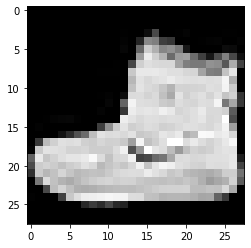

In [88]:
import matplotlib.pyplot as plt

plt.imshow(x_train_all[0], cmap='gray')
plt.show()

## 6. check out the contents and meaning of target 

In [89]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


In [90]:
class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵글부츠']

In [91]:
print(class_names[y_train_all[0]])

앵글부츠


## 7. Verify the distribution of target

In [92]:
import numpy as np

np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

## 8. Spliting training set and verification set equally 

In [93]:
#!pip install sklearn

In [94]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all, test_size=0.2, random_state=42)

In [95]:
np.bincount(y_train)

array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800],
      dtype=int64)

## 9. Regularization of Input dataset 

In [96]:
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

print (x_train.shape, x_val.shape)

(48000, 784) (12000, 784)


# # Prepare Target dataset and Train MultiLayered Classfication Neural Newtwork

In [97]:
# 1. Convert the target into one-hot incoding 
# 2. comparing the each element with output of neuron 
# 3. one-hot incoding using to_categorical function 

tf.keras.utils.to_categorical([0, 1, 3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [98]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

print(y_train_encoded.shape, y_val_encoded.shape)

(48000, 10) (12000, 10)


In [99]:
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [100]:
y_val_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [101]:
print(y_train[0], y_train_encoded[0])

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [102]:
# 4. Trainning MultiLayered Classification Neural Network using MultiClassNetwork class 

fc = MultiClassNetwork(units=100, batch_size=256)
fc.fit(x_train, y_train_encoded, 
      x_val=x_val, y_val=y_val_encoded, epochs=40)


........................................

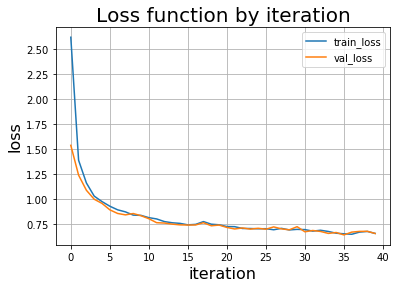

In [103]:
# 5. Verify the Graph for Training loss and verification loss and scores for training model  

plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.title('Loss function by iteration', fontsize=(20))
plt.ylabel('loss', fontsize=(16))
plt.xlabel('iteration', fontsize=(16))
plt.legend(['train_loss','val_loss'])

plt.grid()
plt.show()

In [104]:
fc.score(x_val, y_val_encoded)

TypeError: argmax() got an unexpected keyword argument 'zxis'